# UNDERSTANDING DATA

In [226]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [227]:
#Loading dataset
df=pd.read_csv("Train-1617360447408-1660719685476.csv")


In [228]:
#Shape of data
df.shape

(66587, 49)

In [229]:
#Top 5 records
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [230]:
#Last 5 records
df.tail()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0
66586,51312,153167502,81985473,Caucasian,Female,[80-90),?,2,?,38,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [231]:
#Inforamtion of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

# EXPLORATIVE DATA ANALYSIS FOR TRAIN DATA



In [232]:
#missing value treatment
df.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [233]:
#Treating missing value'?'
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 1504
gender 0
age 0
weight 64454
medical_specialty 32672
diag_1 15
diag_2 231
diag_3 954
diag_4 954
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [234]:
df.drop(['medical_specialty','weight'],axis=1,inplace=True)

In [235]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [236]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
diag_4 0
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [237]:
df.isnull().sum().sum()

0

In [238]:
#Feature engineering
df.head(3).T

,0,1,2
index,69375,57272,82347
encounter_id,197029140,163571946,256497366
patient_id,51521940,92631357,30023982
race,Hispanic,Caucasian,Caucasian
gender,Male,Male,Female
age,[80-90),[60-70),[50-60)
time_in_hospital,4,3,6
num_lab_procedures,39,34,50
num_procedures,1,1,2
num_medications,9,12,24


In [239]:
#Service_util feature will be combination of all no of inpatient,outpatient and no of emmergency
df['Service_util']=df['number_inpatient']+df['number_outpatient']+df['number_emergency']
df['Service_util']

0        6
1        0
2        5
3        0
4        0
        ..
66581    0
66582    0
66583    0
66584    2
66586    0
Name: Service_util, Length: 64128, dtype: int64

In [240]:
df.drop(['number_inpatient','number_outpatient','number_emergency'],axis=1,inplace=True)

In [241]:
#Categorical to numerical conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               64128 non-null  int64  
 1   encounter_id        64128 non-null  int64  
 2   patient_id          64128 non-null  int64  
 3   race                64128 non-null  object 
 4   gender              64128 non-null  object 
 5   age                 64128 non-null  object 
 6   time_in_hospital    64128 non-null  int64  
 7   num_lab_procedures  64128 non-null  int64  
 8   num_procedures      64128 non-null  int64  
 9   num_medications     64128 non-null  int64  
 10  diag_1              64128 non-null  object 
 11  diag_2              64128 non-null  object 
 12  diag_3              64128 non-null  object 
 13  diag_4              64128 non-null  object 
 14  diag_5              64128 non-null  float64
 15  number_diagnoses    64128 non-null  int64  
 16  X1  

In [242]:
df['race'].unique()

array(['Hispanic', 'Caucasian', 'AfricanAmerican', 'Other', 'Asian'],
      dtype=object)

In [243]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'race'.
df['race']= label_encoder.fit_transform(df['race'])
df['race'].unique()


array([3, 2, 0, 4, 1])

In [244]:
df['race'].dtype

dtype('int32')

In [245]:
df['gender']=pd.get_dummies(df['gender'],drop_first=True)
df['gender']=df['gender'].astype(int)

In [246]:
df['age'].unique()

array(['[80-90)', '[60-70)', '[50-60)', '[70-80)', '[40-50)', '[20-30)',
       '[30-40)', '[90-100)', '[10-20)', '[0-10)'], dtype=object)

In [247]:
#using mapping function
#df['age']=df['age'].map({'0-10':1,'10-20':2,"20-30":3,'30-40':4,'40-50':5,'50-60':6,'60-70':7,'70-80':8,'80:90':9,'90:100':10})
#OR
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'race'.
df['age']= label_encoder.fit_transform(df['age'])
df['age'].unique()

array([8, 6, 5, 7, 4, 2, 3, 9, 1, 0])

In [248]:
#replacing miss values in diag_1 to diag_4
df['diag_1'] =  pd.to_numeric(df['diag_1'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_2'] =  pd.to_numeric(df['diag_2'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_3'] =  pd.to_numeric(df['diag_3'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_4'] =  pd.to_numeric(df['diag_4'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_1'].fillna(df['diag_1'].mean(), inplace=True)
df['diag_2'].fillna(df['diag_1'].mean(), inplace=True)
df['diag_3'].fillna(df['diag_1'].mean(), inplace=True)
df['diag_4'].fillna(df['diag_1'].mean(), inplace=True)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               64128 non-null  int64  
 1   encounter_id        64128 non-null  int64  
 2   patient_id          64128 non-null  int64  
 3   race                64128 non-null  int32  
 4   gender              64128 non-null  int32  
 5   age                 64128 non-null  int32  
 6   time_in_hospital    64128 non-null  int64  
 7   num_lab_procedures  64128 non-null  int64  
 8   num_procedures      64128 non-null  int64  
 9   num_medications     64128 non-null  int64  
 10  diag_1              64128 non-null  float64
 11  diag_2              64128 non-null  float64
 12  diag_3              64128 non-null  float64
 13  diag_4              64128 non-null  float64
 14  diag_5              64128 non-null  float64
 15  number_diagnoses    64128 non-null  int64  
 16  X1  

In [250]:
#Combining diag_1 to diag_5 as primary diagonis feature
#df['Pdiagonsis']=df['diag_1']+df['diag_2']+df['diag_3']+df['diag_4']+df['diag_5']
#df.drop(['diag_1','diag_2','diag_3','diag_4','diag_5'],axis=1,inplace=True)

In [251]:
#Checking unique value from X1 to X25
keys=df.iloc[:,11:36]
keys.head(10)

,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,403.00,585.0,585.0,32.970966,9,None,None,No,No,No,...,No,No,Steady,No,No,No,No,No,No,No
1,788.00,569.0,569.0,94.116731,6,None,None,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,403.00,585.0,585.0,64.138297,9,None,None,No,No,No,...,No,No,No,No,No,No,No,No,No,Down
3,783.00,250.0,250.0,13.832428,7,None,Norm,No,No,No,...,No,No,No,No,No,No,No,No,No,Down
4,276.00,300.0,300.0,82.898368,9,>200,None,No,No,No,...,No,No,No,No,No,No,No,No,No,No
5,250.02,414.0,414.0,91.161586,5,None,None,No,No,No,...,No,No,No,No,No,No,No,No,No,Down
6,411.00,998.0,998.0,7.955308,7,None,None,No,No,No,...,No,No,No,No,No,No,No,No,No,No
7,250.00,780.0,780.0,13.440904,6,None,None,No,No,No,...,No,No,No,No,No,No,No,No,No,No
8,427.00,458.0,458.0,10.157840,9,None,None,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
9,411.00,427.0,427.0,46.145948,9,None,>8,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [252]:
#We drop the features which is having only no and steady doseage in it
df = df.drop(['X6', 'X8', 'X11', 'X15', 'X16', 'X17', 'X18', 'X19', 'X22', 'X23', 'X24', 'X25'], axis=1)

In [253]:
#Dropping index,encounter id and patientid ,since they have less significance in data
df.drop(['index','patient_id'],axis=1,inplace=True)

In [254]:
#Using label encoding for the remaining value in the below features
val=df.iloc[:,9:21]
val.head(10)

,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,X7,X9
0,403.00,585.0,585.0,32.970966,9,None,None,No,No,No,No,No
1,788.00,569.0,569.0,94.116731,6,None,None,No,No,No,No,No
2,403.00,585.0,585.0,64.138297,9,None,None,No,No,No,No,No
3,783.00,250.0,250.0,13.832428,7,None,Norm,No,No,No,No,No
4,276.00,300.0,300.0,82.898368,9,>200,None,No,No,No,No,No
5,250.02,414.0,414.0,91.161586,5,None,None,No,No,No,No,No
6,411.00,998.0,998.0,7.955308,7,None,None,No,No,No,No,No
7,250.00,780.0,780.0,13.440904,6,None,None,No,No,No,No,No
8,427.00,458.0,458.0,10.157840,9,None,None,Steady,No,No,No,No
9,411.00,427.0,427.0,46.145948,9,None,>8,No,No,No,No,No


In [255]:
#Label encoding
val = ['None', 'Norm', '>8', '>7', '>200', '>300','No', 'Steady', 'Up', 'Down']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cval = label_encoder.fit_transform(val)
print(cval)

[6 7 3 2 0 1 5 8 9 4]


In [256]:
df.replace(val, cval, inplace=True)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   encounter_id        64128 non-null  int64  
 1   race                64128 non-null  int32  
 2   gender              64128 non-null  int32  
 3   age                 64128 non-null  int32  
 4   time_in_hospital    64128 non-null  int64  
 5   num_lab_procedures  64128 non-null  int64  
 6   num_procedures      64128 non-null  int64  
 7   num_medications     64128 non-null  int64  
 8   diag_1              64128 non-null  float64
 9   diag_2              64128 non-null  float64
 10  diag_3              64128 non-null  float64
 11  diag_4              64128 non-null  float64
 12  diag_5              64128 non-null  float64
 13  number_diagnoses    64128 non-null  int64  
 14  X1                  64128 non-null  int64  
 15  X2                  64128 non-null  int64  
 16  X3  

In [258]:
#Treating 'change' feature into integer
df['change'].unique()

array([5, 'Ch'], dtype=object)

In [259]:
#Using label encoding for the above features
ch1 = ['No', 'Ch']
ch2 = label_encoder.fit_transform(ch1)
print(ch2)

[1 0]


In [260]:
df['change'].replace(ch1, ch2, inplace=True)
df['change'].unique()

array([5, 0], dtype=int64)

In [261]:
#Treating 'diabetesMed' feature into integer
df['diabetesMed'].unique()

array(['Yes', 5], dtype=object)

In [262]:
#Using label encoding for the above features
ch2 = ['No', 'Yes']
ch3 = label_encoder.fit_transform(ch2)
print(ch3)

[0 1]


In [263]:
df['diabetesMed'].replace(ch2, ch3, inplace=True)
df['diabetesMed'].unique()

array([1, 5], dtype=int64)

In [264]:
#converting Pdigonsis into integer
#df['Pdiagonsis']=df['Pdiagonsis'].astype(int)

In [265]:
#We can combine no of lab procedure and no of procedure as Total no of procedure
df['Total_procedure']=df['num_procedures']+df['num_lab_procedures']

In [266]:
df.drop(['num_procedures','num_lab_procedures'],axis=1,inplace=True)

In [267]:
df.isnull().sum().sum()

0

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   encounter_id      64128 non-null  int64  
 1   race              64128 non-null  int32  
 2   gender            64128 non-null  int32  
 3   age               64128 non-null  int32  
 4   time_in_hospital  64128 non-null  int64  
 5   num_medications   64128 non-null  int64  
 6   diag_1            64128 non-null  float64
 7   diag_2            64128 non-null  float64
 8   diag_3            64128 non-null  float64
 9   diag_4            64128 non-null  float64
 10  diag_5            64128 non-null  float64
 11  number_diagnoses  64128 non-null  int64  
 12  X1                64128 non-null  int64  
 13  X2                64128 non-null  int64  
 14  X3                64128 non-null  int64  
 15  X4                64128 non-null  int64  
 16  X5                64128 non-null  int64 

In [269]:
df['readmitted'].value_counts()

0    34128
1    30000
Name: readmitted, dtype: int64

# PREPROCESSING ON TEST DATA

In [270]:
df_test=pd.read_csv("test-1617360461595-1660719701431.csv")

In [271]:
df_test.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),?,3,?,45,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),?,2,?,10,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),?,11,InternalMedicine,41,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),?,1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),?,7,InternalMedicine,59,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [272]:
df_test.shape

(16647, 48)

In [273]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16647 entries, 0 to 16646
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16647 non-null  int64  
 1   encounter_id        16647 non-null  int64  
 2   patient_id          16647 non-null  int64  
 3   race                16647 non-null  object 
 4   gender              16647 non-null  object 
 5   age                 16647 non-null  object 
 6   weight              16647 non-null  object 
 7   time_in_hospital    16647 non-null  int64  
 8   medical_specialty   16647 non-null  object 
 9   num_lab_procedures  16647 non-null  int64  
 10  num_procedures      16647 non-null  int64  
 11  num_medications     16647 non-null  int64  
 12  number_outpatient   16647 non-null  int64  
 13  number_emergency    16647 non-null  int64  
 14  number_inpatient    16647 non-null  int64  
 15  diag_1              16647 non-null  object 
 16  diag

In [274]:
df_test.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [275]:
#Treating missing value'?'
for col in df_test.columns:
    if df_test[col].dtype == object:
         print(col,df_test[col][df_test[col] == '?'].count())

race 371
gender 0
age 0
weight 16107
medical_specialty 8081
diag_1 3
diag_2 63
diag_3 247
diag_4 247
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [276]:
df_test.drop(['medical_specialty','weight'],axis=1,inplace=True)

In [277]:
drop_Idx = set(df_test[(df_test['diag_1'] == '?') & (df_test['diag_2'] == '?') & (df_test['diag_3'] == '?')].index)
drop_Idx = drop_Idx.union(set(df_test['diag_1'][df_test['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df_test['diag_2'][df_test['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df_test['diag_3'][df_test['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df_test['race'][df_test['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df_test['gender'][df_test['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df_test.index) - set(drop_Idx))
df_test = df_test.iloc[new_Idx]

In [278]:
for col in df_test.columns:
    if df_test[col].dtype == object:
         print(col,df_test[col][df_test[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
diag_4 0
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [279]:
df_test.isnull().sum().sum()

0

In [280]:
#Feature engineering on test data
df_test.head().T

,0,1,2,3,4
index,11128,79758,52497,64504,987
encounter_id,46325466,245219616,155321232,179491944,7425954
patient_id,3928383,60926103,25234848,86935374,2486826
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,AfricanAmerican
gender,Female,Male,Male,Female,Female
age,[70-80),[60-70),[70-80),[70-80),[50-60)
time_in_hospital,3,2,11,1,7
num_lab_procedures,45,10,41,71,59
num_procedures,3,1,1,2,2
num_medications,10,16,15,11,18


In [281]:
#Service_util feature will be combination of all no of inpatient,outpatient and no of emmergency
df_test['Service_util']=df_test['number_inpatient']+df_test['number_outpatient']+df_test['number_emergency']
df_test['Service_util']

0        1
1        1
2        1
3        0
4        0
        ..
16641    2
16642    0
16643    0
16644    2
16646    1
Name: Service_util, Length: 16028, dtype: int64

In [282]:
df_test.drop(['number_inpatient','number_outpatient','number_emergency'],axis=1,inplace=True)

In [283]:
#Categorical to numerical conversion
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16028 entries, 0 to 16646
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16028 non-null  int64  
 1   encounter_id        16028 non-null  int64  
 2   patient_id          16028 non-null  int64  
 3   race                16028 non-null  object 
 4   gender              16028 non-null  object 
 5   age                 16028 non-null  object 
 6   time_in_hospital    16028 non-null  int64  
 7   num_lab_procedures  16028 non-null  int64  
 8   num_procedures      16028 non-null  int64  
 9   num_medications     16028 non-null  int64  
 10  diag_1              16028 non-null  object 
 11  diag_2              16028 non-null  object 
 12  diag_3              16028 non-null  object 
 13  diag_4              16028 non-null  object 
 14  diag_5              16028 non-null  float64
 15  number_diagnoses    16028 non-null  int64  
 16  X1  

In [284]:
df_test['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other'],
      dtype=object)

In [285]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'race'.
df_test['race']= label_encoder.fit_transform(df_test['race'])
df_test['race'].unique()


array([2, 0, 1, 3, 4])

In [286]:
df_test['gender']=pd.get_dummies(df_test['gender'],drop_first=True)
df_test['gender']=df_test['gender'].astype(int)

In [287]:
df_test['age'].unique()

array(['[70-80)', '[60-70)', '[50-60)', '[90-100)', '[30-40)', '[40-50)',
       '[10-20)', '[80-90)', '[20-30)', '[0-10)'], dtype=object)

In [288]:
#using mapping function
#df['age']=df['age'].map({'0-10':1,'10-20':2,"20-30":3,'30-40':4,'40-50':5,'50-60':6,'60-70':7,'70-80':8,'80:90':9,'90:100':10})
#OR
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'race'.
df_test['age']= label_encoder.fit_transform(df_test['age'])
df_test['age'].unique()

array([7, 6, 5, 9, 3, 4, 1, 8, 2, 0])

In [289]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16028 entries, 0 to 16646
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16028 non-null  int64  
 1   encounter_id        16028 non-null  int64  
 2   patient_id          16028 non-null  int64  
 3   race                16028 non-null  int32  
 4   gender              16028 non-null  int32  
 5   age                 16028 non-null  int32  
 6   time_in_hospital    16028 non-null  int64  
 7   num_lab_procedures  16028 non-null  int64  
 8   num_procedures      16028 non-null  int64  
 9   num_medications     16028 non-null  int64  
 10  diag_1              16028 non-null  object 
 11  diag_2              16028 non-null  object 
 12  diag_3              16028 non-null  object 
 13  diag_4              16028 non-null  object 
 14  diag_5              16028 non-null  float64
 15  number_diagnoses    16028 non-null  int64  
 16  X1  

In [290]:
#replacing miss values in diag_1 to diag_4
df_test['diag_1'] =  pd.to_numeric(df_test['diag_1'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df_test['diag_2'] =  pd.to_numeric(df_test['diag_2'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df_test['diag_3'] =  pd.to_numeric(df_test['diag_3'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df_test['diag_4'] =  pd.to_numeric(df_test['diag_4'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df_test['diag_1'].fillna(df_test['diag_1'].mean(), inplace=True)
df_test['diag_2'].fillna(df_test['diag_1'].mean(), inplace=True)
df_test['diag_3'].fillna(df_test['diag_1'].mean(), inplace=True)
df_test['diag_4'].fillna(df_test['diag_1'].mean(), inplace=True)

In [291]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16028 entries, 0 to 16646
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16028 non-null  int64  
 1   encounter_id        16028 non-null  int64  
 2   patient_id          16028 non-null  int64  
 3   race                16028 non-null  int32  
 4   gender              16028 non-null  int32  
 5   age                 16028 non-null  int32  
 6   time_in_hospital    16028 non-null  int64  
 7   num_lab_procedures  16028 non-null  int64  
 8   num_procedures      16028 non-null  int64  
 9   num_medications     16028 non-null  int64  
 10  diag_1              16028 non-null  float64
 11  diag_2              16028 non-null  float64
 12  diag_3              16028 non-null  float64
 13  diag_4              16028 non-null  float64
 14  diag_5              16028 non-null  float64
 15  number_diagnoses    16028 non-null  int64  
 16  X1  

In [292]:
#Checking unique value from X1 to X25
keys=df_test.iloc[:,16:41]
keys.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
0,None,None,No,No,No,No,No,No,No,Steady,...,No,No,No,No,No,No,No,No,No,No
1,None,None,Steady,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,None,Norm,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
3,None,None,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,None,>7,Steady,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
5,None,None,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
6,None,None,Steady,No,No,No,No,No,Steady,No,...,No,No,No,No,Steady,No,No,No,No,No
7,None,None,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
9,None,None,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
10,None,>8,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No


In [293]:
#We drop the features which is having only no and steady doseage in it
df_test = df_test.drop(['X6', 'X8', 'X11', 'X15', 'X16', 'X17', 'X18', 'X19', 'X22', 'X23', 'X24', 'X25'], axis=1)

In [294]:
#Dropping index,encounter id and patientid ,since they have less significance in data
df_test.drop(['index','patient_id'],axis=1,inplace=True)

In [295]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16028 entries, 0 to 16646
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   encounter_id        16028 non-null  int64  
 1   race                16028 non-null  int32  
 2   gender              16028 non-null  int32  
 3   age                 16028 non-null  int32  
 4   time_in_hospital    16028 non-null  int64  
 5   num_lab_procedures  16028 non-null  int64  
 6   num_procedures      16028 non-null  int64  
 7   num_medications     16028 non-null  int64  
 8   diag_1              16028 non-null  float64
 9   diag_2              16028 non-null  float64
 10  diag_3              16028 non-null  float64
 11  diag_4              16028 non-null  float64
 12  diag_5              16028 non-null  float64
 13  number_diagnoses    16028 non-null  int64  
 14  X1                  16028 non-null  object 
 15  X2                  16028 non-null  object 
 16  X3  

In [296]:
#Using label encoding for the remaining value in the below features
val=df_test.iloc[:,14:26]
val.head(10)

,X1,X2,X3,X4,X5,X7,X9,X10,X12,X13,X14,X20
0,None,None,No,No,No,No,No,Steady,No,No,No,No
1,None,None,Steady,No,No,No,No,No,No,No,No,No
2,None,Norm,No,No,No,No,No,No,No,No,No,Steady
3,None,None,No,No,No,No,No,No,No,No,No,No
4,None,>7,Steady,No,No,No,No,No,No,No,No,Steady
5,None,None,No,No,No,No,No,No,No,No,No,No
6,None,None,Steady,No,No,No,Steady,No,No,No,No,Steady
7,None,None,No,No,No,No,No,No,No,No,No,No
9,None,None,No,No,No,No,No,No,No,No,No,Down
10,None,>8,No,No,No,No,No,No,No,Steady,No,Up


In [297]:
#Label encoding
val = ['None', 'Norm', '>8', '>7', '>200', '>300','No', 'Steady', 'Up', 'Down']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cval = label_encoder.fit_transform(val)
print(cval)

[6 7 3 2 0 1 5 8 9 4]


In [298]:
df_test.replace(val, cval, inplace=True)

In [299]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16028 entries, 0 to 16646
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   encounter_id        16028 non-null  int64  
 1   race                16028 non-null  int32  
 2   gender              16028 non-null  int32  
 3   age                 16028 non-null  int32  
 4   time_in_hospital    16028 non-null  int64  
 5   num_lab_procedures  16028 non-null  int64  
 6   num_procedures      16028 non-null  int64  
 7   num_medications     16028 non-null  int64  
 8   diag_1              16028 non-null  float64
 9   diag_2              16028 non-null  float64
 10  diag_3              16028 non-null  float64
 11  diag_4              16028 non-null  float64
 12  diag_5              16028 non-null  float64
 13  number_diagnoses    16028 non-null  int64  
 14  X1                  16028 non-null  int64  
 15  X2                  16028 non-null  int64  
 16  X3  

In [300]:
#Treating 'change' feature into integer
df_test['change'].unique()

array([5, 'Ch'], dtype=object)

In [301]:
#Using label encoding for the above features
ch1 = ['No', 'Ch']
ch2 = label_encoder.fit_transform(ch1)
print(ch2)

[1 0]


In [302]:
df_test['change'].replace(ch1, ch2, inplace=True)
df_test['change'].unique()

array([5, 0], dtype=int64)

In [303]:
#Treating 'diabetesMed' feature into integer
df_test['diabetesMed'].unique()

array(['Yes', 5], dtype=object)

In [304]:
#Using label encoding for the above features
ch2 = ['No', 'Yes']
ch3 = label_encoder.fit_transform(ch2)
print(ch3)

[0 1]


In [305]:
df_test['diabetesMed'].replace(ch2, ch3, inplace=True)
df_test['diabetesMed'].unique()

array([1, 5], dtype=int64)

In [306]:
#We can combine no of lab procedure and no of procedure as Total no of procedure
df_test['Total_procedure']=df_test['num_procedures']+df_test['num_lab_procedures']

In [307]:
df_test.drop(['num_procedures','num_lab_procedures'],axis=1,inplace=True)

In [308]:
df_test.isnull().sum().sum()

0

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   encounter_id      64128 non-null  int64  
 1   race              64128 non-null  int32  
 2   gender            64128 non-null  int32  
 3   age               64128 non-null  int32  
 4   time_in_hospital  64128 non-null  int64  
 5   num_medications   64128 non-null  int64  
 6   diag_1            64128 non-null  float64
 7   diag_2            64128 non-null  float64
 8   diag_3            64128 non-null  float64
 9   diag_4            64128 non-null  float64
 10  diag_5            64128 non-null  float64
 11  number_diagnoses  64128 non-null  int64  
 12  X1                64128 non-null  int64  
 13  X2                64128 non-null  int64  
 14  X3                64128 non-null  int64  
 15  X4                64128 non-null  int64  
 16  X5                64128 non-null  int64 

# VISUALIZATION

In [310]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

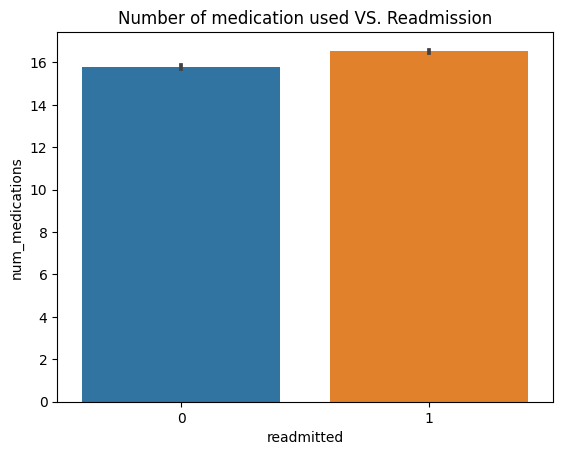

In [311]:

sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

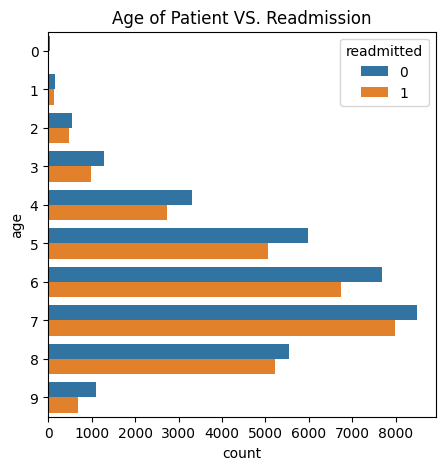

In [312]:
fig = plt.figure(figsize=(5,5))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')


Text(0.5, 1.0, 'race VS. Readmission')

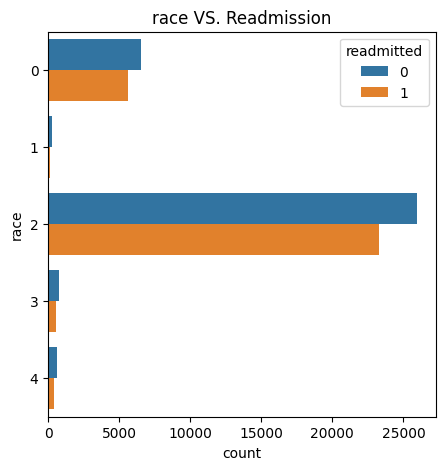

In [313]:
fig = plt.figure(figsize=(5,5))
sns.countplot(y = df['race'], hue = df['readmitted']).set_title('race VS. Readmission')

C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Change of Medication VS. Readmission')

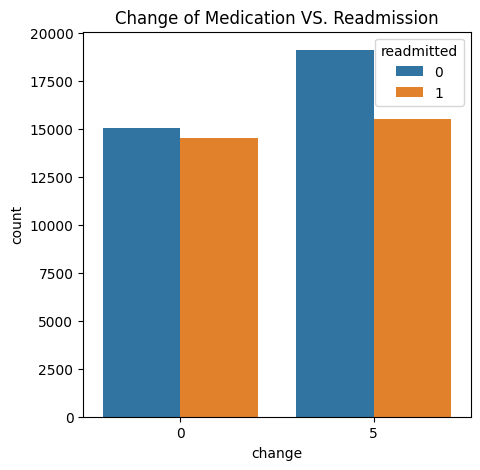

In [314]:
fig = plt.figure(figsize=(5,5))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

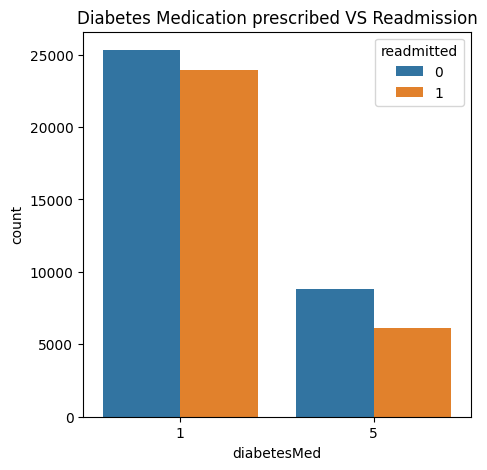

In [315]:
fig = plt.figure(figsize=(5,5))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

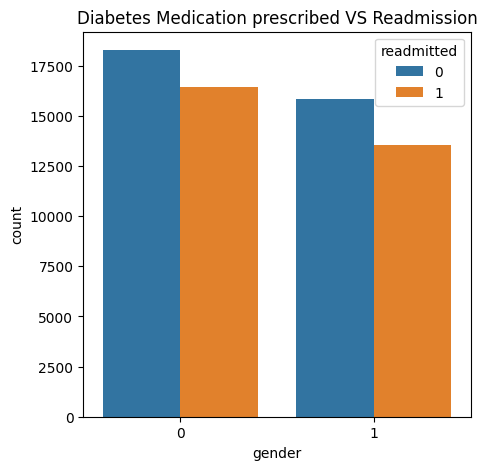

In [316]:
fig = plt.figure(figsize=(5,5))
sns.countplot(df['gender'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

## MODELLING

In [317]:
#x and y split
X=df.drop(['readmitted'],axis=1)
y=df['readmitted']

In [318]:
X.head()

,encounter_id,race,gender,age,time_in_hospital,num_medications,diag_1,diag_2,diag_3,diag_4,...,X10,X12,X13,X14,X20,X21,change,diabetesMed,Service_util,Total_procedure
0,197029140,3,1,8,4,9,783.0,403.0,585.0,585.0,...,5,5,8,5,5,5,5,1,6,40
1,163571946,2,1,6,3,12,564.0,788.0,569.0,569.0,...,5,5,5,5,5,5,5,5,0,35
2,256497366,2,0,5,6,24,574.0,403.0,585.0,585.0,...,5,5,5,5,4,5,0,1,5,52
3,289891212,0,0,7,5,14,401.0,783.0,250.0,250.0,...,5,5,5,5,4,5,0,1,0,63
4,81873900,2,1,7,9,11,311.0,276.0,300.0,300.0,...,5,5,5,5,5,5,5,5,0,18


In [319]:
y.value_counts()

0    34128
1    30000
Name: readmitted, dtype: int64

In [320]:
print(X.shape)
print(y.shape)

(64128, 29)
(64128,)


In [321]:
#train test split
from sklearn.model_selection import train_test_split,validation_curve
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [322]:
#Using Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [323]:
y_pred = clf.predict(x_test)

In [324]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7641249545194657

In [325]:
from sklearn.metrics import f1_score
print ("F1 score : ", f1_score(y_test, y_pred))

F1 score :  0.7337791857327232


# FEATURE IMPORTANCE


In [326]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

feature_importances.head()

,importance
encounter_id,0.108746
diag_5,0.095937
Total_procedure,0.085326
diag_1,0.082163
diag_2,0.079528


In [327]:
import matplotlib.pyplot as plt

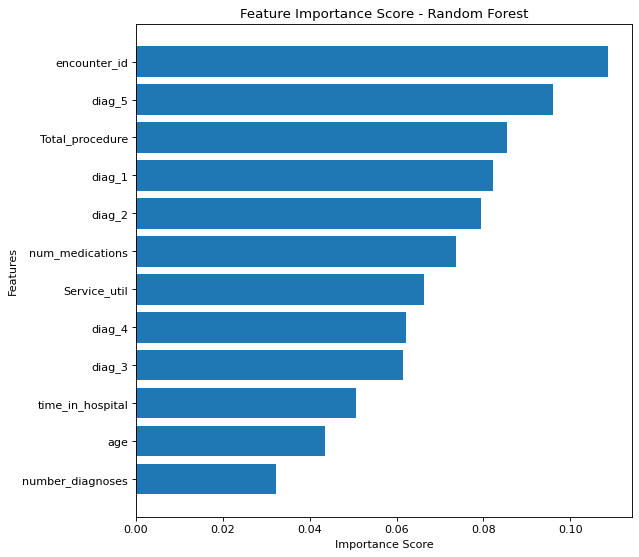

In [328]:
num = 12
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

# HYPERPARAMETER TUNNING

In [329]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [330]:
from sklearn.model_selection import RandomizedSearchCV

In [331]:
# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

In [332]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [337]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [338]:
import time

In [339]:
t1 = time.time()
rf_random.fit(x_train, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

860.1570022106171


In [340]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'gini'}

In [341]:
y_train_preds_random = rf_random.best_estimator_.predict_proba(x_train)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(x_test)[:,1]

In [342]:
rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_test_auc = roc_auc_score(y_test, y_valid_preds_random)
print('Training AUC:%.3f'%(rf_train_auc))
print('Test AUC:%.3f'%(rf_test_auc))

Training AUC:0.753
Test AUC:0.697


# PREDICTIONS

In [343]:
pred = clf.predict(df_test)

In [344]:
pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [345]:
submission = pd.DataFrame(data = df_test['encounter_id'], columns = ['encounter_id'])
submission['Readmitted'] = pred


In [346]:
sample.to_csv('submission.csv', header=True, index=False)

NameError: name 'sample' is not defined